In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

Using TensorFlow backend.


![alt cnn](https://www.guru99.com/images/tensorflow/082918_1325_ConvNetConv1.png)

In [2]:
np.random.seed(2335)  # for reproducibility

learning_rate = 1e-4 

# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# training X shape (60000, 28x28), Y shape (60000, ).
# test X shape (10000, 28x28), Y shape (10000, )
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# data pre-processing
# Standardize feature data 
X_train = X_train.reshape(-1, 1, 28, 28)/255.
X_test = X_test.reshape(-1, 1, 28, 28)/255.
print(X_test.shape, X_train.shape)
# data_format
# A string, one of channels_last (default) or channels_first.
# channels_last corresponds to inputs with shape (batch, ..., channels) 
# while channels_first corresponds to inputs with shape (batch, channels, ...).

# https://keras.io/zh/utils/
y_train_oh = np_utils.to_categorical(y_train, num_classes=10)
y_test_oh = np_utils.to_categorical(y_test, num_classes=10)

(10000, 1, 28, 28) (60000, 1, 28, 28)


In [3]:
# Another way to build your CNN
model = Sequential()

# Conv layer 1 output shape (32, 28, 28)
model.add(Convolution2D(
    batch_input_shape=(None, 1, 28, 28),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same',     # Padding method
    data_format='channels_first',
))
model.add(Activation('relu'))


# Pooling layer 1 (max pooling) output shape (32, 14, 14)
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same',    # Padding method
    data_format='channels_first',
))

# Conv layer 2 output shape (64, 14, 14)
model.add(Convolution2D(64, 5, strides=1, padding='same', data_format='channels_first'))
model.add(Activation('relu'))

# Pooling layer 2 (max pooling) output shape (64, 7, 7)
model.add(MaxPooling2D(2, 2, 'same', data_format='channels_first'))

# Fully connected layer 1 input shape (64 * 7 * 7) = (3136), output shape (1024)
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
#model.add(Dropout(0.4))

# Fully connected layer 2 to shape (10) for 10 classes
model.add(Dense(10))
model.add(Activation('softmax'))

# Another way to define your optimizer
adam = Adam(lr=learning_rate)

# We add metrics to get more results you want to see
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 28, 28)        832       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 28, 28)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 14, 14)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 14, 14)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 64, 14, 14)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 7, 7)          0         
______________________________________

In [4]:
print('Training ------------')
# Another way to train the model
model.fit(X_train, y_train_oh, epochs=1, batch_size=64,)

print('\nTesting ------------')
# Evaluate the model with the metrics we defined earlier
loss, accuracy = model.evaluate(X_test, y_test_oh)

print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)

model.save( ".\cnn_model" )

Training ------------

Epoch 1/1
60000/60000 [==============================] - 254s 4ms/step - loss: 0.2832 - accuracy: 0.9206

Testing ------------
10000/10000 [==============================] - 11s 1ms/step

test loss:  0.08369638742394746

test accuracy:  0.9753000140190125


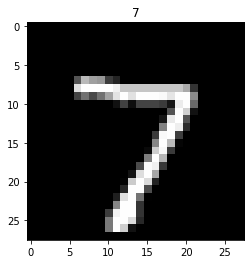

The prediction is: 7
The test label is: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
The predict label is: [[1.32600155e-06 1.02429254e-07 4.49447507e-05 6.34281459e-05
  3.50940681e-08 2.29832290e-06 5.33116953e-11 9.99866366e-01
  3.67337691e-07 2.10534508e-05]]


In [5]:
#model = load_model(".\cnn_model")

# Show image that we want to predict
plt.imshow(X_test[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(y_test_oh[0]))
plt.show()

ans = model.predict(X_test[0].reshape((1, 1, 28, 28)), batch_size=1)
print('The prediction is:', np.argmax(ans))
print('The test label is:', y_test_oh[0])
print('The predict label is:', ans)